In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import random
import numpy as np
import tensorflow as tf
import cv2

In [3]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras import backend as K

In [4]:
def jacard_coef(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

In [5]:
def dataGenerator_test(batchSize,path_images):
    while True:
        imgs_arr = np.zeros((batchSize, 256, 256, 3), dtype = np.float32)
        image_list = os.listdir(path_images)
        for i in range(batchSize):
            image_name = random.choice(image_list)
            img = load_img(os.path.join(path_images,image_name), target_size = (256, 256, 3))
            imgs_arr[i] = img
            imgs_arr[i] = imgs_arr[i] / 255
        yield imgs_arr

In [6]:
def single_image(path):
    imgs_arr = np.zeros((1, 256, 256, 3), dtype = np.float32)
    img = load_img(path, target_size = (256, 256, 3))
    imgs_arr[0] = img
    imgs_arr[0] = imgs_arr[0] / 255
    return imgs_arr

In [7]:
model = tf.keras.models.load_model('../input/model-coco-unet-segm-epoch-21/model_coco_epoch_21',
                                   custom_objects={'jacard_coef':jacard_coef,'jacard_coef_loss':jacard_coef_loss})

2022-06-21 21:54:09.377431: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
#path_images = '../input/coco-2017-dataset/coco2017/test2017'
#for x in dataGenerator_test(16,path_images):
#    break

In [9]:
x = single_image('../input/me-pred/me.png')


In [10]:
img_index = 0

In [11]:
pred = model.predict(x[img_index].reshape((1, 256, 256,3)))

2022-06-21 21:54:19.091234: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [12]:
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
%matplotlib inline

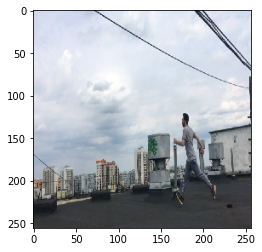

In [13]:
plt.imshow(array_to_img(x[img_index]))

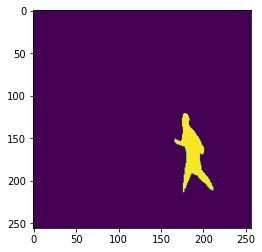

In [14]:
plt.imshow(array_to_img(pred.reshape((256, 256, 1))))